In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input
from tensorflow.keras.models import Model


In [4]:
# Loading and preparing the data

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
 

x_train = x_train / 255
x_test = x_test / 255
 
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test  = np.reshape(x_test,  (len(x_test),  28, 28, 1))

In [5]:
# Autoencoder architecture
input_img = Input(shape=(28, 28, 1))
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
encoded = Dense(49, activation='relu')(x)

encoder = Model(input_img, encoded, name="encoder")
#encoder.compile(optimizer='adam', loss='mean_squared_error')

input_enc = Input(shape=(49,))
d = Dense(64, activation='relu')(input_enc)
d = Dense(28*28, activation='sigmoid')(d)
decoded = Reshape((28, 28, 1))(d)

decoder = Model(input_enc, decoded, name="decoder")
#decoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
autoencoder.compile(optimizer='adam', loss='mean_squared_error')



In [6]:
batch_size = 60
history = autoencoder.fit(x_train, x_train, epochs=20, batch_size=batch_size, shuffle=True, 
          validation_data=(x_test, x_test))

Epoch 1/20
1000/1000 [==============================] - 4s 3ms/step - loss: 0.0293 - val_loss: 0.0191
Epoch 2/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0176 - val_loss: 0.0163
Epoch 3/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0156 - val_loss: 0.0150
Epoch 4/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0144 - val_loss: 0.0140
Epoch 5/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0136 - val_loss: 0.0133
Epoch 6/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0130 - val_loss: 0.0128
Epoch 7/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0125 - val_loss: 0.0125
Epoch 8/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0121 - val_loss: 0.0120
Epoch 9/20
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 10/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.011

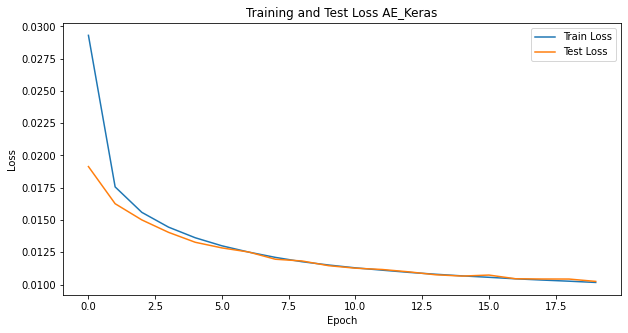

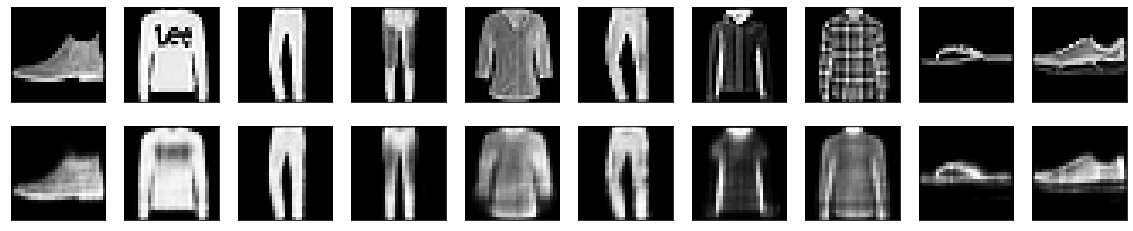

In [7]:
# Графік функції втрат
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss AE_Keras')
plt.legend()
plt.show()




n = 10
 
imgs = x_test[:n]
decoded_imgs = autoencoder.predict(x_test[:n], batch_size=n)
 
plt.figure(figsize=(2*n, 2*2))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(imgs[i].squeeze(), cmap='gray')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
 
  ax2 = plt.subplot(2, n, i+n+1)
  plt.imshow(decoded_imgs[i].squeeze(), cmap='gray')
  ax2.get_xaxis().set_visible(False)
  ax2.get_yaxis().set_visible(False)

In [9]:
def plot_digits(*images):
    images = [x.squeeze() for x in images]
    n = min([x.shape[0] for x in images])
 
    plt.figure(figsize=(2*n, 2*len(images)))
    for j in range(n):
        for i in range(len(images)):
            ax = plt.subplot(len(images), n, i*n + j + 1)
            plt.imshow(images[i][j])
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
 
    plt.show()
 
def plot_homotopy(frm, to, n=10, autoencoder=None):
    z = np.zeros(([n] + list(frm.shape)))
    for i, t in enumerate(np.linspace(0., 1., n)):
        z[i] = frm * (1-t) + to * t  # Гомотопія за прямою
    if autoencoder: 
        plot_digits(autoencoder.predict(z, batch_size=n))
    else:
        plot_digits(z)

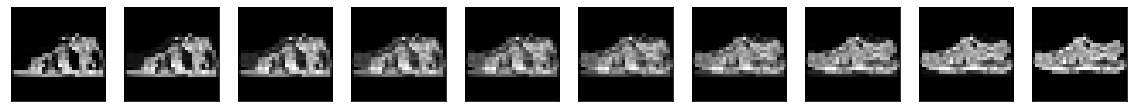

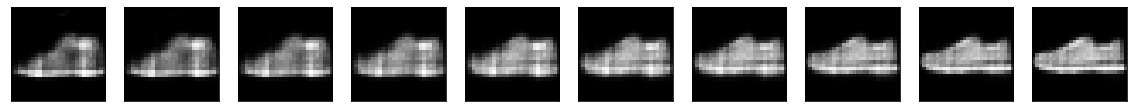

In [10]:
frm, to = x_test[y_test == 5][1:3]
plot_homotopy(frm, to)
plot_homotopy(frm, to, autoencoder=autoencoder)

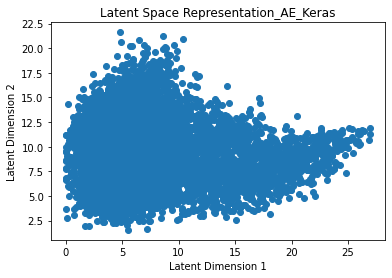

In [11]:
# Побудова графіка розподілу представлень
h = encoder.predict(x_test)
plt.scatter(h[:, 0], h[:, 1])
plt.title('Latent Space Representation_AE_Keras')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.show()